In [1]:
import matplotlib.pyplot as plt
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import sklearn


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df=pd.read_csv("/kaggle/input/telecom-churn-dataset/WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [3]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [6]:
df.drop("customerID",axis=1,inplace=True)

In [7]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [8]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [9]:
df["TotalCharges"][488]

' '

In [10]:
# pd.to_numeric(df["TotalCharges"])

In [11]:
#df["TotalCharges"].astype("float64")   #ValueError: could not convert string to float: ' '

In [12]:
df.iloc[486]

gender                        Female
SeniorCitizen                      0
Partner                           No
Dependents                        No
tenure                            15
PhoneService                     Yes
MultipleLines                    Yes
InternetService          Fiber optic
OnlineSecurity                    No
OnlineBackup                     Yes
DeviceProtection                  No
TechSupport                       No
StreamingTV                      Yes
StreamingMovies                  Yes
Contract              Month-to-month
PaperlessBilling                 Yes
PaymentMethod       Electronic check
MonthlyCharges                100.15
TotalCharges                    1415
Churn                             No
Name: 486, dtype: object

In [13]:
pd.to_numeric(df["TotalCharges"],errors="coerce").isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [14]:
df['TotalCharges']=df['TotalCharges'].apply(lambda x: x.strip())

In [15]:
df["TotalCharges"]=pd.to_numeric(df["TotalCharges"])

In [16]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [17]:
tenure_churn_yes=df[df.Churn=="Yes"].tenure

In [18]:
tenure_churn_no=df[df.Churn=="No"].tenure

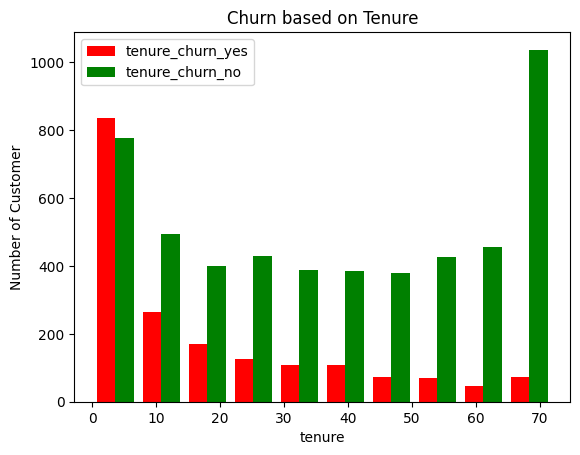

In [19]:
plt.xlabel("tenure")
plt.ylabel("Number of Customer")
plt.title("Churn based on Tenure")

#tenure_churn_yes means this much amount of customers have left the telecom company in the duration
#tenure_churn_no means this much amount of customers have'nt left the telecom company in the duration

plt.hist([tenure_churn_yes,tenure_churn_no],color=["Red","Green"],label=["tenure_churn_yes","tenure_churn_no"])
plt.legend()

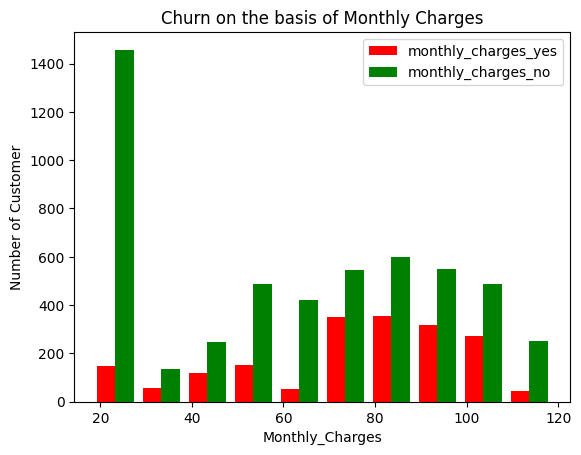

In [20]:
monthly_charges_yes=df[df.Churn=="Yes"].MonthlyCharges
monthly_charges_no=df[df.Churn=="No"].MonthlyCharges

plt.xlabel("Monthly_Charges")
plt.ylabel("Number of Customer")
plt.title("Churn on the basis of Monthly Charges")

plt.hist([monthly_charges_yes,monthly_charges_no],color=["Red","Green"],label=["monthly_charges_yes","monthly_charges_no"])
plt.legend()

In [21]:
df.dropna(subset=["TotalCharges"],inplace=True)
df.shape

(7032, 20)

In [22]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [23]:
def print_unique_col_values(df):
    
    for col in df:
        if df[col].dtypes=="object":
            print(f"{col}:{df[col].unique()}")

In [24]:
df.replace("No phone service", "No",inplace=True)
df.replace("No internet service", "No",inplace=True)

In [25]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [26]:
print_unique_col_values(df)

gender:['Female' 'Male']
Partner:['Yes' 'No']
Dependents:['No' 'Yes']
PhoneService:['No' 'Yes']
MultipleLines:['No' 'Yes']
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:['No' 'Yes']
OnlineBackup:['Yes' 'No']
DeviceProtection:['No' 'Yes']
TechSupport:['No' 'Yes']
StreamingTV:['No' 'Yes']
StreamingMovies:['No' 'Yes']
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:['Yes' 'No']
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn:['No' 'Yes']


In [27]:
yes_no_columns=["Partner","Dependents","PhoneService","MultipleLines","OnlineSecurity","OnlineBackup","DeviceProtection",
               "TechSupport","StreamingTV","StreamingMovies","PaperlessBilling","Churn"]

for col in yes_no_columns:
    df[col].replace({"Yes":1, "No":0},inplace=True)
    

In [28]:
for col in df:
    print(f"{col}:{df[col].unique()}")

gender:['Female' 'Male']
SeniorCitizen:[0 1]
Partner:[1 0]
Dependents:[0 1]
tenure:[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService:[0 1]
MultipleLines:[0 1]
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:[0 1]
OnlineBackup:[1 0]
DeviceProtection:[0 1]
TechSupport:[0 1]
StreamingTV:[0 1]
StreamingMovies:[0 1]
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:[1 0]
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges:[29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges:[  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn:[0 1]


In [29]:
df.gender.replace({"Male":1,"Female":0},inplace=True)

In [30]:
df.dtypes

gender                int64
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
MultipleLines         int64
InternetService      object
OnlineSecurity        int64
OnlineBackup          int64
DeviceProtection      int64
TechSupport           int64
StreamingTV           int64
StreamingMovies       int64
Contract             object
PaperlessBilling      int64
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                 int64
dtype: object

In [31]:
df1=pd.get_dummies(data=df,columns=["PaymentMethod","Contract","InternetService"],dtype=float)

In [32]:
df1.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
PaymentMethod_Bank transfer (automatic)    float64
PaymentMethod_Credit card (automatic)      float64
PaymentMethod_Electronic check 

In [33]:
df1.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'Contract_Month-to-month', 'Contract_One year', 'Contract_Two year',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No'],
      dtype='object')

In [34]:
df1.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
PaymentMethod_Bank transfer (automatic)    float64
PaymentMethod_Credit card (automatic)      float64
PaymentMethod_Electronic check 

In [35]:
scale_columns=["tenure","MonthlyCharges","TotalCharges"]

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

df1[scale_columns]=scaler.fit_transform(df1[scale_columns])


In [36]:
X=df1.drop("Churn",axis=1)
y=df1["Churn"]

In [37]:
X.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Contract_Month-to-month,Contract_One year,Contract_Two year,InternetService_DSL,InternetService_Fiber optic,InternetService_No
0,0,0,1,0,0.000000,0,0,0,1,0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,1,0,0,0,0.464789,1,0,1,0,1,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
2,1,0,0,0,0.014085,1,0,1,1,0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
3,1,0,0,0,0.619718,0,0,1,0,1,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,0,0,0,0,0.014085,1,0,0,0,0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [38]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [39]:
import tensorflow as tf
from tensorflow import keras

In [40]:
model=keras.Sequential([
    keras.layers.Dense(100,input_shape=(26,),activation="relu"),
    keras.layers.Dense(50,activation="relu"),
    keras.layers.Dense(20,activation="relu"),
    keras.layers.Dense(1,activation="sigmoid")
])

model.compile(optimizer="SGD",
             loss="binary_crossentropy",
             metrics=(["accuracy"]))
model.fit(X_train,y_train,epochs=100)

Epoch 1/100
176/176 [==============================] - 5s 3ms/step - loss: 0.6058 - accuracy: 0.7061
Epoch 2/100
176/176 [==============================] - 1s 3ms/step - loss: 0.5307 - accuracy: 0.7342
Epoch 3/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4869 - accuracy: 0.7340
Epoch 4/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4538 - accuracy: 0.7660
Epoch 5/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4376 - accuracy: 0.7908
Epoch 6/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4302 - accuracy: 0.7940
Epoch 7/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4266 - accuracy: 0.7970
Epoch 8/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4238 - accuracy: 0.7972
Epoch 9/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4221 - accuracy: 0.8025
Epoch 10/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4200 - accura

In [41]:
model=keras.Sequential([
    keras.layers.Dense(50,input_shape=(26,),activation="relu"),
    keras.layers.Dense(20,activation="relu"),
    keras.layers.Dense(10,activation="relu"),
    keras.layers.Dense(1,activation="sigmoid")
])

model.compile(optimizer="adam",
             loss="binary_crossentropy",
             metrics=(["accuracy"]))
model.fit(X_train,y_train,epochs=100)

Epoch 1/100
176/176 [==============================] - 3s 3ms/step - loss: 0.5064 - accuracy: 0.7467
Epoch 2/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4231 - accuracy: 0.8007
Epoch 3/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4185 - accuracy: 0.8018
Epoch 4/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4167 - accuracy: 0.8027
Epoch 5/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4140 - accuracy: 0.8032
Epoch 6/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4117 - accuracy: 0.8069
Epoch 7/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4105 - accuracy: 0.8080
Epoch 8/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4115 - accuracy: 0.8057
Epoch 9/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4066 - accuracy: 0.8089
Epoch 10/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4047 - accura

In [42]:
pred=model.predict(X_test)

44/44 [==============================] - 0s 1ms/step


In [43]:
y_test

2481    0
6784    0
6125    1
3052    0
4099    0
       ..
1733    0
5250    0
5465    0
5851    0
3984    0
Name: Churn, Length: 1407, dtype: int64

In [44]:
y_pred=[]

for i in pred:
    if i>=0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [45]:
y_pred[:5]

[0, 0, 1, 0, 0]

In [46]:
y_test[:5]

2481    0
6784    0
6125    1
3052    0
4099    0
Name: Churn, dtype: int64